# Analyse decomposition results

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube
from scipy.stats import lognorm, norm
from reproject import reproject_interp

import matplotlib as mpl

In [5]:
# read the data file

data_dir = '/Users/denes/App_installers/gausspyplus-master/example/decomposition_grs/gpy_decomposed/'
data_file = 'sio21_cube_cut_g+_fit_fin_sf-p2_finalized.dat'
data = ascii.read(os.path.join(data_dir + data_file))


In [46]:
data.keys()

['x_pos',
 'y_pos',
 'RA',
 'DEC',
 'amp',
 'e_amp',
 'VLSR',
 'e_VLSR',
 'vel_disp',
 'e_vel_disp',
 'int_tot',
 'e_int_tot',
 'rms',
 'pvalue',
 'aicc',
 'rchi2',
 'ncomps',
 'ncomp_wmedian',
 'ncomp_jumps',
 'flag_blended',
 'flag_neg_res_peak',
 'flag_broad',
 'flag_centroid']

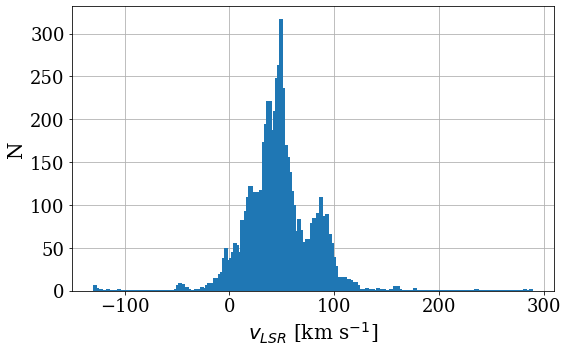

In [10]:
# plot velocity distributio of the components
# this indicates the emission at different velocities -> motion of the gas + different clouds in the line of sight

fig = plt.figure(figsize=(8.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)
d = data['VLSR']
#bin_size = range(80,200, 2) 
plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax.set_xlabel(r'$v_{LSR}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()

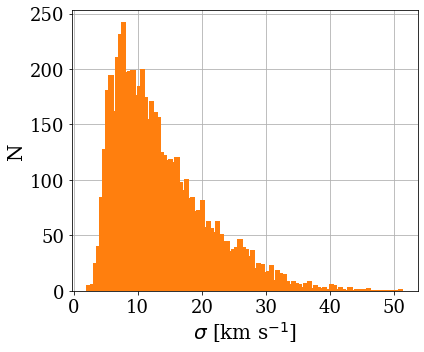

In [14]:
# distribution of line width

fig = plt.figure(figsize=(6.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)
d = abs(data['vel_disp'])
plt.hist(d, bins=100, histtype='step', color='C1', fill=True, linewidth=2)

plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax.set_xlabel(r'$\sigma$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()

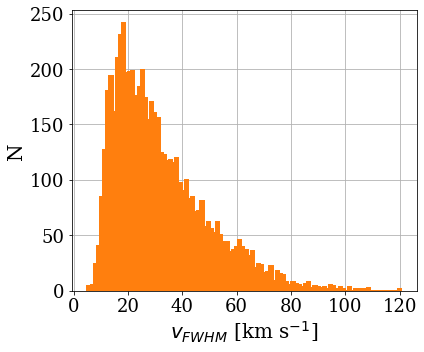

In [18]:
# FWH plots

fig = plt.figure(figsize=(6.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(1,1,1)

#convert sigma to FWHM:
d = abs(data['vel_disp'])*2.355

plt.hist(d, bins=100, histtype='step', color='C1', fill=True, linewidth=2)
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax.set_xlabel(r'$v_{FWHM}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.tight_layout()
plt.show()



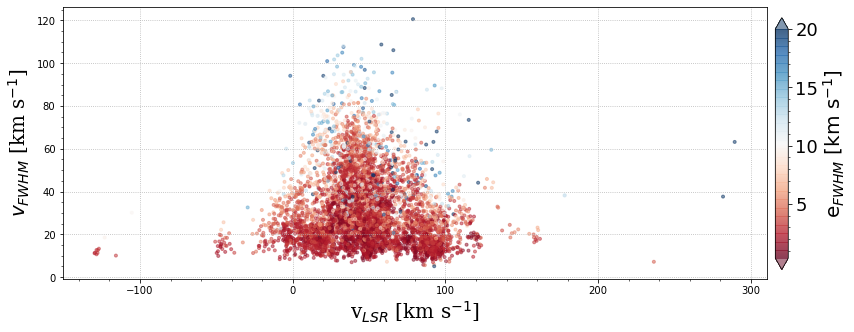

In [28]:
# velocity vs. FWHM

fig = plt.figure(figsize=(12.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])
#plt.title('SiO')

ax = fig.add_subplot(1,1,1)
cb = plt.scatter(data['VLSR'], abs(data['vel_disp']*2.355), marker='.', c=abs(data['e_vel_disp']*2.355), cmap='RdBu', alpha=0.5, vmax=20)
ax.set_xlabel('v$_{LSR}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel(r'$v_{FWHM}$ [km s$^{-1}$]', size=20,family='serif')

#ax.set_ybound(90, 200)
#ax.set_xbound(0, 100)
#ax.axvline(20, color='k')

ax.minorticks_on()
plt.grid(True, linestyle=':')

fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.95, 0.15, 0.015, 0.7])
cbar =fig.colorbar(cb, cax=cbar_ax, extend='both')
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel('e$_{FWHM}$ [km s$^{-1}$]', fontsize=20)
plt.show()

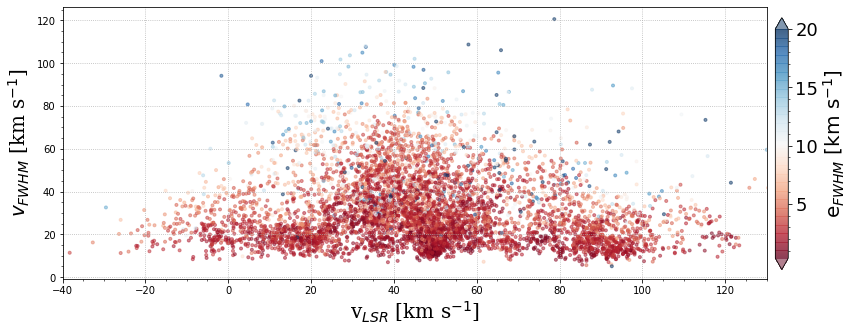

In [29]:
# velocity vs. FWHM

fig = plt.figure(figsize=(12.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])
#plt.title('SiO')

ax = fig.add_subplot(1,1,1)
cb = plt.scatter(data['VLSR'], abs(data['vel_disp']*2.355), marker='.', c=abs(data['e_vel_disp']*2.355), cmap='RdBu', alpha=0.5, vmax=20)
ax.set_xlabel('v$_{LSR}$ [km s$^{-1}$]', size=20,family='serif')
ax.set_ylabel(r'$v_{FWHM}$ [km s$^{-1}$]', size=20,family='serif')

ax.set_xbound(-40, 130)
#ax.set_ybound(90, 200)

ax.minorticks_on()
plt.grid(True, linestyle=':')

fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.95, 0.15, 0.015, 0.7])
cbar =fig.colorbar(cb, cax=cbar_ax, extend='both')
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel('e$_{FWHM}$ [km s$^{-1}$]', fontsize=20)
plt.show()

## Make maps of individual regions in the data cube based on the decomposition

<ipython-input-57-352ac99d2f92>:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


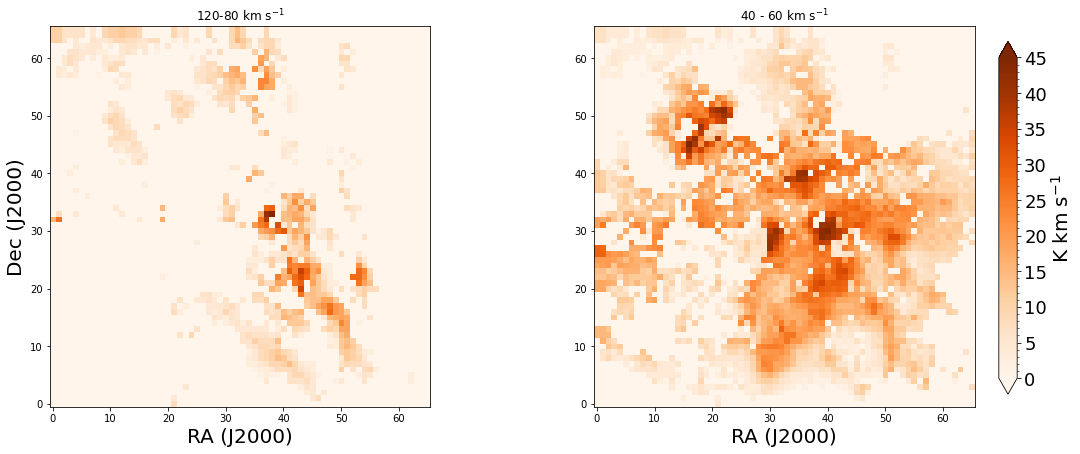

In [57]:


# divide the data into 2 sections:
data_2 = data[abs(data['VLSR'])<(120)] 
data_2 = data[abs(data['VLSR'])>(80)] 


data_3 = data[abs(data['VLSR'])<(60)] 
data_3 = data[abs(data['VLSR'])>(40)] 

# exclude flagged pixels:
data_2 = data_2[abs(data_2['flag_neg_res_peak'])==0] 
data_2 = data_2[abs(data_2['ncomp_jumps'])==0] 
data_2 = data_2[abs(data_2['ncomp_jumps'])==0] 

data_3 = data_3[abs(data_3['flag_neg_res_peak'])==0] 
data_3 = data_3[abs(data_3['ncomp_jumps'])==0] 


# make the plot with the intensities
# first create the grid for the image
x = np.arange(np.max(data['x_pos'])+1)
y = np.arange(np.max(data['y_pos'])+1)
xx, yy = np.meshgrid(x, y, sparse=True)

z_2 = xx + yy
z_2 = z_2*0

z_3 = xx + yy
z_3 = z_3*0

for i in range(len(data_3)):
    k = data_3[i]['y_pos']
    l = data_3[i]['x_pos']
    z_3[k][l] = z_3[k][l] + abs(data_3[i]['int_tot'])

for i in range(len(data_2)):
    k = data_2[i]['y_pos']
    l = data_2[i]['x_pos']
    z_2[k][l] = z_2[k][l] + abs(data_2[i]['int_tot'])

#z_2=np.flip(z_2)
#z_3=np.flip(z_3)


# plot the image
fig = plt.figure(figsize=(17.,7))

ax1 = fig.add_subplot(1,2,1)
plt.title(r'120-80 km s$^{-1}$')
plt.imshow(z_2, cmap='Oranges')
ax1.set_xlabel("RA (J2000)", fontsize=20)
ax1.set_ylabel("Dec (J2000)", fontsize=20)
ax1.invert_yaxis()

ax2 = fig.add_subplot(1,2,2)
plt.title(r'40 - 60 km s$^{-1}$')
cb = plt.imshow(z_3, cmap='Oranges')
ax2.set_xlabel("RA (J2000)", fontsize=20)
#ax.set_ylabel("Dec (J2000)", fontsize=20)
#ax.tick_params(labelsize=16)
ax2.invert_yaxis()

#plt.colorbar() 
fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.93, 0.15, 0.015, 0.7])
cbar =fig.colorbar(cb, cax=cbar_ax, extend='both')
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel('K km s$^{-1}$', fontsize=20)

fig.show()
